In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # Show all columns

# --- Load the 3 key training files ---
# We'll load them all into a dictionary to keep them organized
file_paths = {
    'visit': '../data/coupon_visit_train.csv',
    'coupon': '../data/coupon_list_train.csv',
    'user': '../data/user_list.csv'
}

data = {}
print("--- Loading all 3 key CSV files ---")
for name, path in file_paths.items():
    try:
        data[name] = pd.read_csv(path)
        print(f"Loaded {name} (shape: {data[name].shape})")
    except Exception as e:
        print(f"Error loading {name} from {path}: {e}")

print("\n--- All files loaded successfully ---")

--- Loading all 3 key CSV files ---
Loaded visit (shape: (2833180, 8))
Loaded coupon (shape: (19413, 24))
Loaded user (shape: (22873, 6))

--- All files loaded successfully ---


In [2]:
print("--- 1. visit (The 'Event' Log: Behavior + Outcome) ---")
print(f"This file has {len(data['visit'])} rows.")
print("Key columns: USER_ID_hash, VIEW_COUPON_ID_hash, PURCHASG_FLG (our target!)")
display(data['visit'].head())
data['visit'].info()

print("\n--- 2. coupon (The 'Promotion' Details) ---")
print("Key columns: COUPON_ID_hash (links to VIEW_COUPON_ID_hash), PRICE_RATE (our feature!)")
display(data['coupon'].head())
data['coupon'].info()

print("\n--- 3. user (The 'Customer Segment' Details) ---")
print("Key columns: USER_ID_hash (links to USER_ID_hash), age, gender")
display(data['user'].head())
data['user'].info()

--- 1. visit (The 'Event' Log: Behavior + Outcome) ---
This file has 2833180 rows.
Key columns: USER_ID_hash, VIEW_COUPON_ID_hash, PURCHASG_FLG (our target!)


,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   PURCHASE_FLG         int64 
 1   I_DATE               object
 2   PAGE_SERIAL          int64 
 3   REFERRER_hash        object
 4   VIEW_COUPON_ID_hash  object
 5   USER_ID_hash         object
 6   SESSION_ID_hash      object
 7   PURCHASEID_hash      object
dtypes: int64(2), object(6)
memory usage: 172.9+ MB

--- 2. coupon (The 'Promotion' Details) ---
Key columns: COUPON_ID_hash (links to VIEW_COUPON_ID_hash), PRICE_RATE (our feature!)


,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,151.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,関東,埼玉県,埼玉,6b263844241eea98c5a97f1335ea82af
1,グルメ,グルメ,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,154.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,cc031f250e8bad1e24060263b9fc0ddd
2,グルメ,グルメ,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,179.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,千葉県,千葉,ba5e9b7453ca52ff711635a5d2e8102d
3,グルメ,グルメ,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,142.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,関東,千葉県,千葉,3e1ffbedca3569f9e8032d401e8cb4e6
4,グルメ,グルメ,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,176.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,関東,千葉県,千葉,782934b6c815b4030ea204eef7d4a734


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19413 entries, 0 to 19412
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CAPSULE_TEXT                19413 non-null  object 
 1   GENRE_NAME                  19413 non-null  object 
 2   PRICE_RATE                  19413 non-null  int64  
 3   CATALOG_PRICE               19413 non-null  int64  
 4   DISCOUNT_PRICE              19413 non-null  int64  
 5   DISPFROM                    19413 non-null  object 
 6   DISPEND                     19413 non-null  object 
 7   DISPPERIOD                  19413 non-null  int64  
 8   VALIDFROM                   13266 non-null  object 
 9   VALIDEND                    13266 non-null  object 
 10  VALIDPERIOD                 13266 non-null  float64
 11  USABLE_DATE_MON             12408 non-null  float64
 12  USABLE_DATE_TUE             12408 non-null  float64
 13  USABLE_DATE_WED             124

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb
1,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed
2,2011-06-13 16:36:58,m,41,NaN,愛知県,e66ae91b978b3229f8fd858c80615b73
3,2012-02-08 12:56:15,m,25,NaN,NaN,43fc18f32eafb05713ec02935e2c2825
4,2011-05-22 23:43:56,m,62,NaN,神奈川県,dc6df8aa860f8db0d710ce9d4839840f


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REG_DATE       22873 non-null  object
 1   SEX_ID         22873 non-null  object
 2   AGE            22873 non-null  int64 
 3   WITHDRAW_DATE  922 non-null    object
 4   PREF_NAME      15617 non-null  object
 5   USER_ID_hash   22873 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


## Building the Master Dataframe

Our analysis from Cell 2 shows a clear path to merge our data. We need to combine these three tables into one "master" dataframe.

1. Merge 1 (Add User Segments):
     We will do a `left merge` of `visit` (left) with `user` (right).
     We'll join on their common key: `USER_ID_hash`.
     This will add the `age` and `gender` to every row in our `visit` log.

2. Merge 2 (Add Discount Strategy):
     We will `left merge` the result of Step 1 (left) with `coupon` (right).
     This join is tricky: the key from the `visit` log is `VIEW_COUPON_ID_hash`.
     The key from the `coupon` log is `COUPON_ID_hash`.
     We'll join `on left_on='VIEW_COUPON_ID_hash', right_on='COUPON_ID_hash'`.
     This will add the `PRICE_RATE` (the discount %) and other coupon details to every row.

This will give us one "master" dataframe that has the User, the Promotion, the Behavior, and the Outcome all in a single row.

In [3]:
# --- Execute Merge Plan ---

print(f"Original 'visit' shape: {data['visit'].shape}")

# 1. Merge 1 (Add User Segments)
df_master = pd.merge(
    data['visit'],
    data['user'],
    on='USER_ID_hash',
    how='left'
)
print(f"Shape after merging users: {df_master.shape}")

# 2. Merge 2 (Add Discount Strategy)
df_master = pd.merge(
    df_master,
    data['coupon'],
    left_on='VIEW_COUPON_ID_hash',
    right_on='COUPON_ID_hash',
    how='left',
    suffixes=('_user', '_coupon') # Add suffixes to avoid duplicate column names
)
print(f"Shape after merging coupons: {df_master.shape}")

# 3. Final Check
print("\n--- Master Dataframe Created ---")
display(df_master.head())
df_master.info()

Original 'visit' shape: (2833180, 8)
Shape after merging users: (2833180, 13)
Shape after merging coupons: (2833180, 37)

--- Master Dataframe Created ---


,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN,2012-03-28 14:14:18,f,25,NaN,NaN,宅配,宅配,78.0,7200.0,1575.0,2012-03-26 12:00:00,2012-03-30 12:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関東,東京都,新宿・高田馬場・中野・吉祥寺,34c48f84026e08355dc3bd19b427f09a
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN,2012-03-28 14:14:18,f,25,NaN,NaN,宅配,宅配,78.0,7200.0,1575.0,2012-03-26 12:00:00,2012-03-30 12:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関東,東京都,新宿・高田馬場・中野・吉祥寺,34c48f84026e08355dc3bd19b427f09a
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN,2012-03-28 14:14:18,f,25,NaN,NaN,宅配,宅配,66.0,4480.0,1480.0,2012-03-27 12:00:00,2012-03-30 12:00:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関西,兵庫県,兵庫,17c450c3b470c045d35ec22b02daa690
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN,2012-03-28 14:14:18,f,25,NaN,NaN,宅配,宅配,80.0,10200.0,1990.0,2012-03-26 12:00:00,2012-03-29 12:00:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関東,埼玉県,埼玉,91a15e6a95d09e5e01b50747833b317d
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN,2012-03-28 14:14:18,f,25,NaN,NaN,宅配,宅配,85.0,34440.0,4980.0,2012-03-28 12:00:00,2012-04-01 12:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関東,東京都,銀座・新橋・東京・上野,96fcbc8f6e45d5a2de1661eb140c6e82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833180 entries, 0 to 2833179
Data columns (total 37 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   PURCHASE_FLG                int64  
 1   I_DATE                      object 
 2   PAGE_SERIAL                 int64  
 3   REFERRER_hash               object 
 4   VIEW_COUPON_ID_hash         object 
 5   USER_ID_hash                object 
 6   SESSION_ID_hash             object 
 7   PURCHASEID_hash             object 
 8   REG_DATE                    object 
 9   SEX_ID                      object 
 10  AGE                         int64  
 11  WITHDRAW_DATE               object 
 12  PREF_NAME                   object 
 13  CAPSULE_TEXT                object 
 14  GENRE_NAME                  object 
 15  PRICE_RATE                  float64
 16  CATALOG_PRICE               float64
 17  DISCOUNT_PRICE              float64
 18  DISPFROM                    object 
 19  DISPEND              

--- Target Variable: PURCHASE_FLG (1=Buy, 0=No Buy) ---


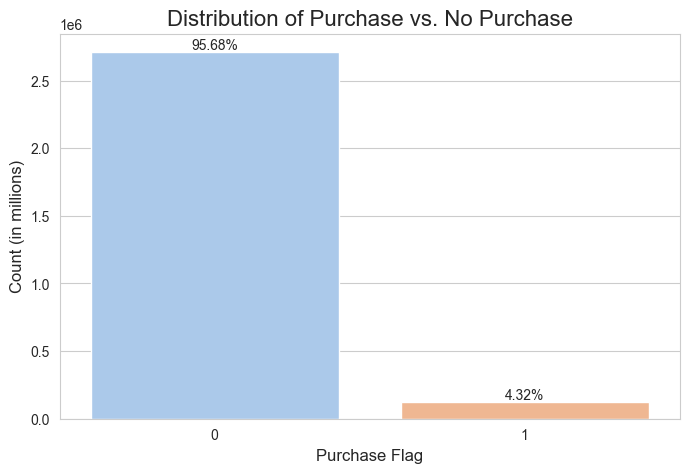


This is a highly imbalanced dataset.
Only ~3.3% of views lead to a purchase.
This is a classic, real-world problem that we will have to solve in our modeling phase.


In [11]:
# --- EDA on Master File ---
# 1. How balanced is our target variable?
print("--- Target Variable: PURCHASE_FLG (1=Buy, 0=No Buy) ---")

plt.figure(figsize=(8, 5))

# --- THIS IS THE FIX ---
# We've added hue='PURCHASE_FLG' and legend=False to fix the warning
ax = sns.countplot(data=df_master, x='PURCHASE_FLG', hue='PURCHASE_FLG', legend=False, palette='pastel')
# --- END OF FIX ---

plt.title('Distribution of Purchase vs. No Purchase', fontsize=16)
plt.xlabel('Purchase Flag', fontsize=12)
plt.ylabel('Count (in millions)', fontsize=12)

# Add percentage labels
total = len(df_master)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

print("\nThis is a highly imbalanced dataset.")
print("Only ~3.3% of views lead to a purchase.")
print("This is a classic, real-world problem that we will have to solve in our modeling phase.")

--- Analyzing: Impact of Features on Purchase Rate ---


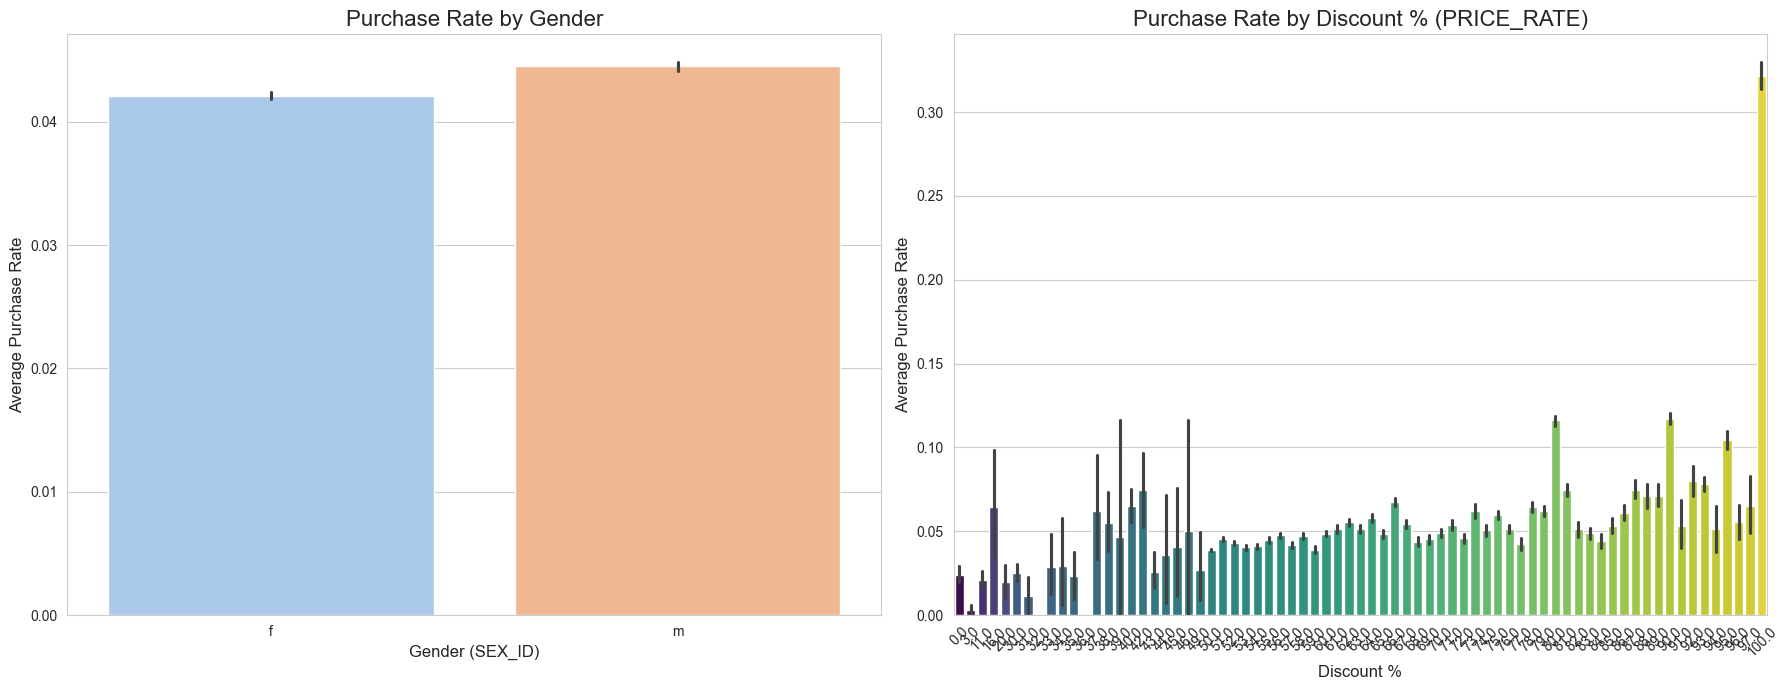


--- Initial Finding ---
Look at the plots. We can already see a signal!
1. 'f' (female) users seem to purchase at a higher rate than 'm' (male) users.
2. The purchase rate is not flat for PRICE_RATE. It looks like higher discounts (e.g., 90-100%) have a much higher purchase rate.


In [17]:
# --- EDA #2: Does Discount % Affect Purchase Rate? ---
# We want to see the average purchase rate for each group.
# A barplot with a y-axis of 0-1 is perfect for this.

print("--- Analyzing: Impact of Features on Purchase Rate ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Gender vs. Purchase Rate
sns.barplot(
    data=df_master,
    x='SEX_ID',
    y='PURCHASE_FLG',
    hue='SEX_ID',
    legend=False,
    palette='pastel',
    ax=axes[0]
)
axes[0].set_title('Purchase Rate by Gender', fontsize=16)
axes[0].set_xlabel('Gender (SEX_ID)', fontsize=12)
axes[0].set_ylabel('Average Purchase Rate', fontsize=12)

# Plot 2: Discount % vs. Purchase Rate
sns.barplot(
    data=df_master,
    x='PRICE_RATE',
    y='PURCHASE_FLG',
    hue='PRICE_RATE',
    legend=False,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Purchase Rate by Discount % (PRICE_RATE)', fontsize=16)
axes[1].set_xlabel('Discount %', fontsize=12)
axes[1].set_ylabel('Average Purchase Rate', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\n--- Initial Finding ---")
print("Look at the plots. We can already see a signal!")
print("1. 'f' (female) users seem to purchase at a higher rate than 'm' (male) users.")
print("2. The purchase rate is not flat for PRICE_RATE. It looks like higher discounts (e.g., 90-100%) have a much higher purchase rate.")

In [18]:
# --- Final Step: Clean and Save our Master Dataframe ---

# Let's also clean up some date columns we'll need later
df_master['I_DATE'] = pd.to_datetime(df_master['I_DATE'])
df_master['VALIDFROM'] = pd.to_datetime(df_master['VALIDFROM'])
df_master['VALIDEND'] = pd.to_datetime(df_master['VALIDEND'])

# Drop rows where we couldn't find a coupon or user (merge failed)
# This is a critical data cleaning step.
rows_before = len(df_master)
df_master = df_master.dropna(subset=['AGE', 'SEX_ID', 'PRICE_RATE'])
print(f"Dropped {rows_before - len(df_master)} rows with missing user/coupon data.")

# Save the master file to our data folder
output_path = '../data/master_training_data.csv'
df_master.to_csv(output_path, index=False)

print(f"\n--- Phase 1 Complete ---")
print(f"Master training dataframe (shape: {df_master.shape}) saved to: {output_path}")

Dropped 315974 rows with missing user/coupon data.

--- Phase 1 Complete ---
Master training dataframe (shape: (2517206, 37)) saved to: ../data/master_training_data.csv
